## Test 6: Data Visualization 

The Sales team wants to understand which sales owners are particularly successful in creating orders in plastic crates. Create a set of appropriate visualizations / reports that help your stakeholders to understand the following aspects better:

- What is the distribtion of orders by crate type.
- Which sales owners need most training to improve selling on plastic crates, based on the last 12 months orders.
- Understand who are by month the top 5 performers selling plastic crates for a rolling 3 months evaluation window.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import json
from datetime import datetime, timedelta
import seaborn as sns

In [2]:
orders_file = Path("../data/orders.csv")
orders_df= pd.read_csv(orders_file, delimiter = ';')
orders_df.head()

order_id      date  \
0  f47ac10b-58cc-4372-a567-0e02b2c3d479  29.01.22   
1  f47ac10b-58cc-4372-a567-0e02b2c3d480  21.02.22   
2  f47ac10b-58cc-4372-a567-0e02b2c3d481  03.04.22   
3  f47ac10b-58cc-4372-a567-0e02b2c3d482  14.07.21   
4  f47ac10b-58cc-4372-a567-0e02b2c3d483  23.10.22   

                             company_id      company_name crate_type  \
0  1e2b47e6-499e-41c6-91d3-09d12dddfbbd   Fresh Fruits Co    Plastic   
1  0f05a8f1-2bdf-4be7-8c82-4c9b58f04898       Veggies Inc       Wood   
2  1e2b47e6-499e-41c6-91d3-09d12dddfbbd  Fresh Fruits c.o      Metal   
3  1c4b0b50-1d5d-463a-b56e-1a6fd3aeb7d6  Seafood Supplier    Plastic   
4  34538e39-cd2e-4641-8d24-3c94146e6f16  Meat Packers Ltd    Plastic   

                                        contact_data  \
0  [{ "contact_name":"Curtis", "contact_surname":...   
1  [{ "contact_name":"Maria", "contact_surname":"...   
2  [{ "contact_name":"Para", "contact_surname":"C...   
3                                                NaN   
4                                                NaN   

                                         salesowners  
0      Leonard Cohen, Luke Skywalker, Ammy Winehouse  
1          Luke Skywalker, David Goliat, Leon Leonov  
2                                     Luke Skywalker  
3                        David Goliat, Leonard Cohen  
4  Chris Pratt, David Henderson, Marianov Merschi...

## 1. Orders distribution by crate type

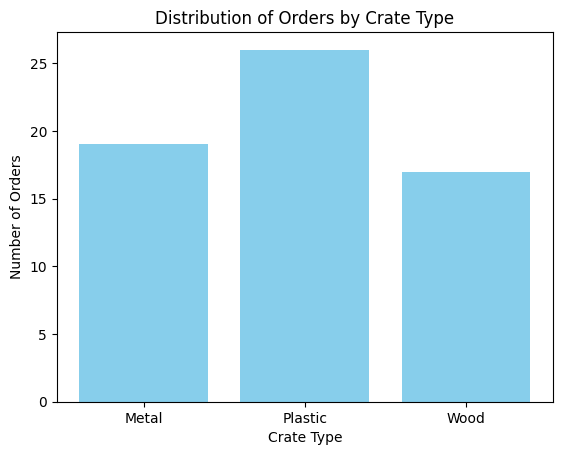

In [3]:
# Distribution of orders 

crate_distribution = orders_df.groupby("crate_type").size().reset_index(name="order_count")
plt.bar(crate_distribution['crate_type'], crate_distribution['order_count'], color='skyblue')
plt.title("Distribution of Orders by Crate Type")
plt.xlabel("Crate Type")
plt.ylabel("Number of Orders")
plt.show()

Easiest dashboard to visualize distribution is barchart

## 2. Worst performing sales owners on plastic crates for the last 12 months

In [4]:
# Sales Owners Needing Training for Plastic Crates based on last 12 months

orders_df.date.describe()

count           62
unique          62
top       29.01.22
freq             1
Name: date, dtype: object

In [5]:
orders_df["date"] = pd.to_datetime(orders_df['date'],format='%d.%m.%y')
orders_df["date"].describe()

count                               62
mean     2023-12-25 03:52:15.483870976
min                2021-07-14 00:00:00
25%                2022-12-28 18:00:00
50%                2024-02-06 00:00:00
75%                2025-02-14 18:00:00
max                2025-06-15 00:00:00
Name: date, dtype: object

In [6]:
# Filter for last 12 months and plastic crates
last_12_months = datetime.now() - timedelta(days=365)
plastic_crates = orders_df[(orders_df['crate_type'] == 'Plastic') & (pd.to_datetime(orders_df['date'],format='%d.%m.%y') >= last_12_months)].copy()

In [7]:
# split and explode sales owners

# Split the sales_owner column into lists
plastic_crates['salesowners'] = plastic_crates['salesowners'].str.split(',')

# # Explode the lists into individual rows
exploded_df = plastic_crates.explode('salesowners').copy()

# # Remove any leading/trailing whitespaces from sales owner names
exploded_df['salesowners'] = exploded_df['salesowners'].str.strip()

exploded_df

order_id       date  \
30  f47ac10b-58cc-4372-a567-0e02b2c3d509 2024-01-30   
30  f47ac10b-58cc-4372-a567-0e02b2c3d509 2024-01-30   
33  f47ac10b-58cc-4372-a567-0e02b2c3d512 2024-03-27   
33  f47ac10b-58cc-4372-a567-0e02b2c3d512 2024-03-27   
33  f47ac10b-58cc-4372-a567-0e02b2c3d512 2024-03-27   
36  f47ac10b-58cc-4372-a567-0e02b2c3d515 2024-06-12   
36  f47ac10b-58cc-4372-a567-0e02b2c3d515 2024-06-12   
36  f47ac10b-58cc-4372-a567-0e02b2c3d515 2024-06-12   
39  f47ac10b-58cc-4372-a567-0e02b2c3d518 2024-09-28   
39  f47ac10b-58cc-4372-a567-0e02b2c3d518 2024-09-28   
39  f47ac10b-58cc-4372-a567-0e02b2c3d518 2024-09-28   
41  f47ac10b-58cc-4372-a567-0e02b2c3d520 2024-11-17   
41  f47ac10b-58cc-4372-a567-0e02b2c3d520 2024-11-17   
41  f47ac10b-58cc-4372-a567-0e02b2c3d520 2024-11-17   
44  f47ac10b-58cc-4372-a567-0e02b2c3d523 2025-01-25   
44  f47ac10b-58cc-4372-a567-0e02b2c3d523 2025-01-25   
45  f47ac10b-58cc-4372-a567-0e02b2c3d524 2025-02-02   
45  f47ac10b-58cc-4372-a567-0e02b2c3d524 2025-02-02   
45  f47ac10b-58cc-4372-a567-0e02b2c3d524 2025-02-02   
49  f47ac10b-58cc-4372-a567-0e02b2c3d528 2025-03-12   
49  f47ac10b-58cc-4372-a567-0e02b2c3d528 2025-03-12   
49  f47ac10b-58cc-4372-a567-0e02b2c3d528 2025-03-12   
50  f47ac10b-58cc-4372-a567-0e02b2c3d529 2025-03-21   
50  f47ac10b-58cc-4372-a567-0e02b2c3d529 2025-03-21   
50  f47ac10b-58cc-4372-a567-0e02b2c3d529 2025-03-21   
53  f47ac10b-58cc-4372-a567-0e02b2c3d532 2025-04-12   
53  f47ac10b-58cc-4372-a567-0e02b2c3d532 2025-04-12   
54  f47ac10b-58cc-4372-a567-0e02b2c3d533 2025-04-16   
54  f47ac10b-58cc-4372-a567-0e02b2c3d533 2025-04-16   
54  f47ac10b-58cc-4372-a567-0e02b2c3d533 2025-04-16   
55  f47ac10b-58cc-4372-a567-0e02b2c3d534 2025-04-30   
55  f47ac10b-58cc-4372-a567-0e02b2c3d534 2025-04-30   
58  f47ac10b-58cc-4372-a567-0e02b2c3d537 2025-05-20   
58  f47ac10b-58cc-4372-a567-0e02b2c3d537 2025-05-20   
60  f47ac10b-58cc-4372-a567-0e02b2c3d539 2025-06-04   
60  f47ac10b-58cc-4372-a567-0e02b2c3d539 2025-06-04   

                              company_id         company_name crate_type  \
30  0d09ae2b-d9a5-4d67-bb97-963be9379b4e     Healthy Eats Ltd    Plastic   
30  0d09ae2b-d9a5-4d67-bb97-963be9379b4e     Healthy Eats Ltd    Plastic   
33  9851fa89-7b7a-4ed5-89f7-65c20599e0d2     Fruit Market Ltd    Plastic   
33  9851fa89-7b7a-4ed5-89f7-65c20599e0d2     Fruit Market Ltd    Plastic   
33  9851fa89-7b7a-4ed5-89f7-65c20599e0d2     Fruit Market Ltd    Plastic   
36  2122bb43-1a5e-4f8d-8bb9-4987c9d4a8df       Farm Fresh Ltd    Plastic   
36  2122bb43-1a5e-4f8d-8bb9-4987c9d4a8df       Farm Fresh Ltd    Plastic   
36  2122bb43-1a5e-4f8d-8bb9-4987c9d4a8df       Farm Fresh Ltd    Plastic   
39  d66c0c95-1f86-4d55-9245-bfa98c0f8dcb   Healthy Choices Co    Plastic   
39  d66c0c95-1f86-4d55-9245-bfa98c0f8dcb   Healthy Choices Co    Plastic   
39  d66c0c95-1f86-4d55-9245-bfa98c0f8dcb   Healthy Choices Co    Plastic   
41  1e2b47e6-499e-41c6-91d3-09d12dddfbbd      Fresh Fruits Co    Plastic   
41  1e2b47e6-499e-41c6-91d3-09d12dddfbbd      Fresh Fruits Co    Plastic   
41  1e2b47e6-499e-41c6-91d3-09d12dddfbbd      Fresh Fruits Co    Plastic   
44  1c4b0b50-1d5d-463a-b56e-1a6fd3aeb7d6     Seafood Supplier    Plastic   
44  1c4b0b50-1d5d-463a-b56e-1a6fd3aeb7d6     Seafood Supplier    Plastic   
45  34538e39-cd2e-4641-8d24-3c94146e6f16     Meat Packers Ltd    Plastic   
45  34538e39-cd2e-4641-8d24-3c94146e6f16     Meat Packers Ltd    Plastic   
45  34538e39-cd2e-4641-8d24-3c94146e6f16     Meat Packers Ltd    Plastic   
49  5f0bdbdf-1d84-4c23-957c-8bb8c0ddc89d  Tropical Fruits Ltd    Plastic   
49  5f0bdbdf-1d84-4c23-957c-8bb8c0ddc89d  Tropical Fruits Ltd    Plastic   
49  5f0bdbdf-1d84-4c23-957c-8bb8c0ddc89d  Tropical Fruits Ltd    Plastic   
50  27c59f76-5d26-4b82-a89b-59f8dfd2e9a7       Healthy Snacks    Plastic   
50  27c59f76-5d26-4b82-a89b-59f8dfd2e9a7       Healthy Snacks    Plastic   
50  27c59f76-5d26-4b82-a89b-59f8dfd2e9a7       Healthy Snacks    Plastic   
53  0f05a8f1-2bdf-4b

In [8]:
plastic_sales = exploded_df.groupby("salesowners").size().reset_index(name="plastic_orders_12m")
plastic_sales = plastic_sales.sort_values(by='plastic_orders_12m', ascending=True).reset_index()
plastic_sales[["salesowners", "plastic_orders_12m"]]

salesowners  plastic_orders_12m
0  Marianov Merschik                   2
1        Leon Leonov                   2
2        Marie Curie                   2
3       David Goliat                   3
4       Yuri Gagarin                   3
5     Luke Skywalker                   3
6    David Henderson                   4
7     Ammy Winehouse                   5
8      Leonard Cohen                   6
9        Chris Pratt                   6

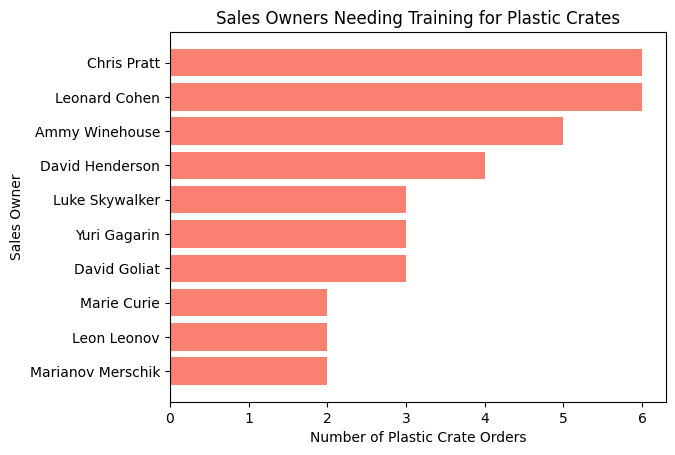

In [9]:
plt.barh(plastic_sales['salesowners'], plastic_sales['plastic_orders_12m'], color='salmon')
plt.title("Sales Owners Needing Training for Plastic Crates")
plt.xlabel("Number of Plastic Crate Orders")
plt.ylabel("Sales Owner")
plt.show()

The 3 employies less involved in plasic plastic crates orders for the past 12 months are Marianov, Leon nd Marie. After them David, Yuri and Luke making a total of 6 workers to propose for more training in plastic crates.

To get better results I would add the insight of which level of ownership do each worker has for each sell, or even the revenue directly. It is not the same to be be involved in 2 orders being the main owner or being the 4th in the list of ownership having little participation.

## 3. Top 5 monthly performers selling plastic crates, based on a 3 months rolling window

In [10]:
plastic_crates = orders_df[orders_df["crate_type"]=='Plastic'].copy()
plastic_crates['date'] = pd.to_datetime(plastic_crates['date'],format='%d.%m.%y')
plastic_crates['month'] = pd.to_datetime(plastic_crates['date']).dt.to_period('M')                                                                              # split and explode sales owners

# Split the sales_owner column into lists
plastic_crates['salesowners'] = plastic_crates['salesowners'].str.split(',')

# # Explode the lists into individual rows
exploded_df = plastic_crates.explode('salesowners').copy()

# # Remove any leading/trailing whitespaces from sales owner names
exploded_df['salesowners'] = exploded_df['salesowners'].str.strip()

In [11]:
monthly_performance = exploded_df.groupby(['month', 'salesowners']).size().reset_index(name='orders_count').copy()

# rolling 3-months performance

monthly_performance['rolling3'] = monthly_performance.groupby('salesowners')['orders_count'].transform(
    lambda x: x.rolling(3, min_periods = 1).sum() )
# min_periods ensures that for the first and second months 
# (when there aren’t enough previous months to fill a 3-month window), 
# the rolling sum will still calculate using the available data.
monthly_performance

month        salesowners  orders_count  rolling3
0   2021-07       David Goliat             1       1.0
1   2021-07      Leonard Cohen             1       1.0
2   2022-01     Ammy Winehouse             1       1.0
3   2022-01      Leonard Cohen             1       2.0
4   2022-01     Luke Skywalker             1       1.0
..      ...                ...           ...       ...
61  2025-04  Marianov Merschik             1       3.0
62  2025-05        Chris Pratt             1       3.0
63  2025-05        Leon Leonov             1       4.0
64  2025-06        Chris Pratt             1       3.0
65  2025-06     Luke Skywalker             1       3.0

[66 rows x 4 columns]

rolling function does not take into account the orders of the months and the gaps in months, not all workers have sells in everymonth. Data for all workers has to be added for everymonth. Then data needs to be sorted chronologically.

In [12]:
# full range of months
end, start = plastic_crates['date'].max(), plastic_crates['date'].min()
month_range = pd.date_range(start = start, end = end, freq='MS')
month_range = month_range.strftime('%Y-%m')
# Map a full range of months per owner
owners = exploded_df['salesowners'].unique()
index = pd.MultiIndex.from_product([owners, month_range], names=["salesowners","month"])

# monthly_performance = monthly_performance.groupby(["salesowners", "month"], as_index=False)["orders_count"].sum()
df = monthly_performance.set_index(["salesowners", "month"]).reindex(index).reset_index()

# Fill NaN with 0
df["orders_count"] = df["orders_count"].fillna(0)
df = df.sort_values(["salesowners", "month"])

In [13]:
df[df["salesowners"]=='Chris Pratt']

salesowners    month  orders_count  rolling3
188  Chris Pratt  2021-08           0.0       NaN
189  Chris Pratt  2021-09           0.0       NaN
190  Chris Pratt  2021-10           0.0       NaN
191  Chris Pratt  2021-11           0.0       NaN
192  Chris Pratt  2021-12           0.0       NaN
193  Chris Pratt  2022-01           0.0       NaN
194  Chris Pratt  2022-02           0.0       NaN
195  Chris Pratt  2022-03           0.0       NaN
196  Chris Pratt  2022-04           0.0       NaN
197  Chris Pratt  2022-05           0.0       NaN
198  Chris Pratt  2022-06           0.0       NaN
199  Chris Pratt  2022-07           0.0       NaN
200  Chris Pratt  2022-08           0.0       NaN
201  Chris Pratt  2022-09           0.0       NaN
202  Chris Pratt  2022-10           1.0       1.0
203  Chris Pratt  2022-11           1.0       2.0
204  Chris Pratt  2022-12           0.0       NaN
205  Chris Pratt  2023-01           0.0       NaN
206  Chris Pratt  2023-02           0.0       NaN
207  Chris Pratt  2023-03           0.0       NaN
208  Chris Pratt  2023-04           0.0       NaN
209  Chris Pratt  2023-05           0.0       NaN
210  Chris Pratt  2023-06           0.0       NaN
211  Chris Pratt  2023-07           0.0       NaN
212  Chris Pratt  2023-08           1.0       3.0
213  Chris Pratt  2023-09           0.0       NaN
214  Chris Pratt  2023-10           0.0       NaN
215  Chris Pratt  2023-11           1.0       3.0
216  Chris Pratt  2023-12           0.0       NaN
217  Chris Pratt  2024-01           0.0       NaN
218  Chris Pratt  2024-02           0.0       NaN
219  Chris Pratt  2024-03           0.0       NaN
220  Chris Pratt  2024-04           0.0       NaN
221  Chris Pratt  2024-05           0.0       NaN
222  Chris Pratt  2024-06           0.0       NaN
223  Chris Pratt  2024-07           0.0       NaN
224  Chris Pratt  2024-08           0.0       NaN
225  Chris Pratt  2024-09           1.0       3.0
226  Chris Pratt  2024-10           0.0       NaN
227  Chris Pratt  2024-11           0.0       NaN
228  Chris Pratt  2024-12           0.0       NaN
229  Chris Pratt  2025-01           0.0       NaN
230  Chris Pratt  2025-02           1.0       3.0
231  Chris Pratt  2025-03           1.0       3.0
232  Chris Pratt  2025-04           1.0       3.0
233  Chris Pratt  2025-05           1.0       3.0
234  Chris Pratt  2025-06           1.0       3.0

In [14]:
# rolling 3-months performance

df['rolling3'] = df.groupby('salesowners')['orders_count'].transform(
    lambda x: x.rolling(3, min_periods = 1).sum() )
df[df["salesowners"]=='Chris Pratt']

salesowners    month  orders_count  rolling3
188  Chris Pratt  2021-08           0.0       0.0
189  Chris Pratt  2021-09           0.0       0.0
190  Chris Pratt  2021-10           0.0       0.0
191  Chris Pratt  2021-11           0.0       0.0
192  Chris Pratt  2021-12           0.0       0.0
193  Chris Pratt  2022-01           0.0       0.0
194  Chris Pratt  2022-02           0.0       0.0
195  Chris Pratt  2022-03           0.0       0.0
196  Chris Pratt  2022-04           0.0       0.0
197  Chris Pratt  2022-05           0.0       0.0
198  Chris Pratt  2022-06           0.0       0.0
199  Chris Pratt  2022-07           0.0       0.0
200  Chris Pratt  2022-08           0.0       0.0
201  Chris Pratt  2022-09           0.0       0.0
202  Chris Pratt  2022-10           1.0       1.0
203  Chris Pratt  2022-11           1.0       2.0
204  Chris Pratt  2022-12           0.0       2.0
205  Chris Pratt  2023-01           0.0       1.0
206  Chris Pratt  2023-02           0.0       0.0
207  Chris Pratt  2023-03           0.0       0.0
208  Chris Pratt  2023-04           0.0       0.0
209  Chris Pratt  2023-05           0.0       0.0
210  Chris Pratt  2023-06           0.0       0.0
211  Chris Pratt  2023-07           0.0       0.0
212  Chris Pratt  2023-08           1.0       1.0
213  Chris Pratt  2023-09           0.0       1.0
214  Chris Pratt  2023-10           0.0       1.0
215  Chris Pratt  2023-11           1.0       1.0
216  Chris Pratt  2023-12           0.0       1.0
217  Chris Pratt  2024-01           0.0       1.0
218  Chris Pratt  2024-02           0.0       0.0
219  Chris Pratt  2024-03           0.0       0.0
220  Chris Pratt  2024-04           0.0       0.0
221  Chris Pratt  2024-05           0.0       0.0
222  Chris Pratt  2024-06           0.0       0.0
223  Chris Pratt  2024-07           0.0       0.0
224  Chris Pratt  2024-08           0.0       0.0
225  Chris Pratt  2024-09           1.0       1.0
226  Chris Pratt  2024-10           0.0       1.0
227  Chris Pratt  2024-11           0.0       1.0
228  Chris Pratt  2024-12           0.0       0.0
229  Chris Pratt  2025-01           0.0       0.0
230  Chris Pratt  2025-02           1.0       1.0
231  Chris Pratt  2025-03           1.0       2.0
232  Chris Pratt  2025-04           1.0       3.0
233  Chris Pratt  2025-05           1.0       3.0
234  Chris Pratt  2025-06           1.0       3.0

In [26]:
# Rank within each month
df['rank'] = df.groupby('month')['rolling3'].rank(ascending=False, method='first')

# Filter for top 5 performers
top_performers = df[df['rank'] <= 5]
top_performers = top_performers.sort_values(["month", "rank"])

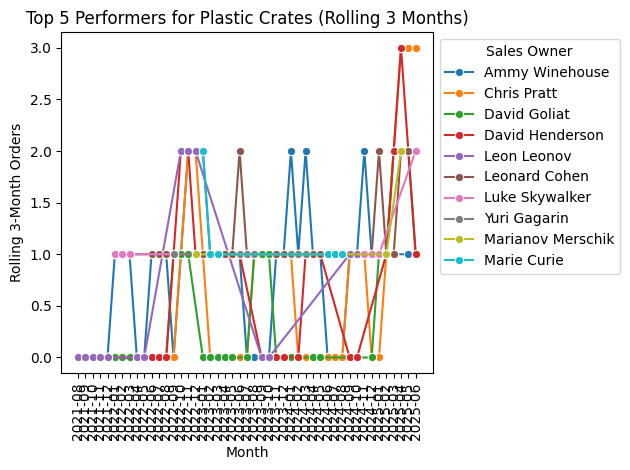

In [27]:
sns.lineplot(
    data=top_performers, 
    x='month', 
    y='rolling3', 
    hue='salesowners', 
    marker="o", 
    palette="tab10"
)
plt.title("Top 5 Performers for Plastic Crates (Rolling 3 Months)")
plt.xlabel("Month")
plt.ylabel("Rolling 3-Month Orders")
plt.xticks(rotation=90)
plt.legend(title="Sales Owner", loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

In [17]:
import ipywidgets as widgets
from ipywidgets import interact
from IPython.display import display

In [31]:
# Create a function to filter the data based on the selected month
def update_plot(selected_month):
    # Filter the DataFrame based on the selected month
    month_data = top_performers[top_performers['month'] == selected_month]
    
    # Create the plot
    plt.figure(figsize=(10, 6))
    sns.barplot(x='salesowners', y='rolling3', data=month_data, palette="viridis") #y rank or rolling3
    plt.title(f"Sales Count for {selected_month}")
    plt.xlabel('Sales Owner')
    plt.ylabel('Sales Count')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Create a list of available months for the dropdown menu
available_months = df['month'].unique()

# Create the widget for month selection
month_dropdown = widgets.Dropdown(
    options=available_months,
    description='Select Month:',
    disabled=False
)

C:\Users\roman\AppData\Local\Temp\ipykernel_14416\1450694803.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='salesowners', y='rolling3', data=month_data, palette="viridis") #y rank or rolling3


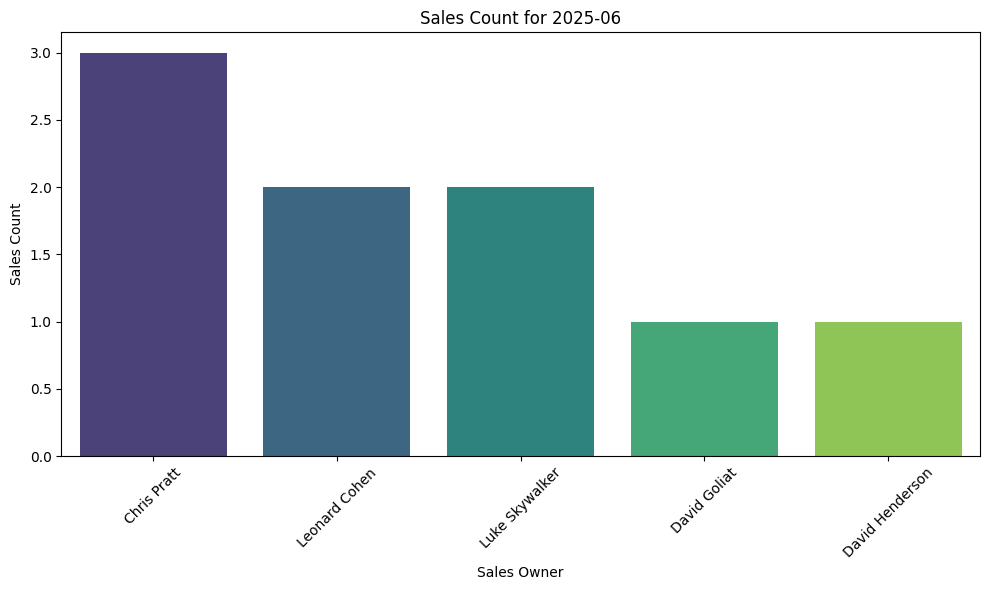

In [40]:
# Select the month - dropdown interactive menu not available
interact(update_plot('2025-06'), selected_month=month_dropdown)

This plot shows the top-5 workers (sorted by rank) who have performed better in plastic crate orders, by the month selected when execuing the interact() function. The performance is evaluated using a 3-months rolling sum of orders. On the 